In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

We know that in general our Hamiltonian has the following form

\begin{equation*} H(f,g) = \int_p^f \frac{z-p}{\lVert \nabla f(X_{\pmb{\theta}(0)} (z))\rVert^2} \mathrm{d}z + \int_q^g \frac{z-q}{\lVert\nabla g(X_{\pmb{\phi}(0)} (z))\rVert^2 } \mathrm{d}z \end{equation*}

We will study the special case where both f and g are sigmoid functions \begin{align} f(x) = \frac{1}{1+ \exp(-x)} \quad g(x) = \frac{1}{1 + \exp(-x)} \end{align}

We can write the derivative of the sigmoid in terms of the sigmoid itself \begin{align} f'(x) = f(x)(1-f(x)) \quad g'(x) = g(x)(1-g(x)) \end{align}

So now we can write down the Hamiltonian \begin{align} H(f,g) = \int_p^f \frac{z-p}{\lvert z (1-z) \rvert^2} \mathrm{d}z + \int_q^g \frac{z-q}{\lvert z (1-z) \rvert^2 } \mathrm{d}z \end{align}

With some help from Mathematica we can evaluate these integrals \begin{align} \int \frac{x-p}{x^2(1-x)^2} = \frac{1-p}{1-x} + \frac{p}{x} + (2p-1)\log(1-x) + (1-2p)\log(x) + c \end{align}

In [2]:
def indefinite(x, p):
    first = (1-p)/(1-x)
    second = p/x
    third = (2*p-1)*np.log(1-x)
    fourth = (1-2*p)*np.log(x)
    return first + second + third+ fourth

def definite(x,p):
    return indefinite(x,p)- indefinite(p,p)

def hamiltonian(f,g, p, q):
    return definite(f,p) + definite(g,q)

So let us try to get some fancy level sets of the Hamiltonian

In [3]:
fs = np.linspace(0.05, 0.95, 150)
gs = np.linspace(0.05, 0.95, 150)
meshF, meshG = np.meshgrid(fs, gs)
values = hamiltonian(meshF, meshG, 0.35 , 0.75)

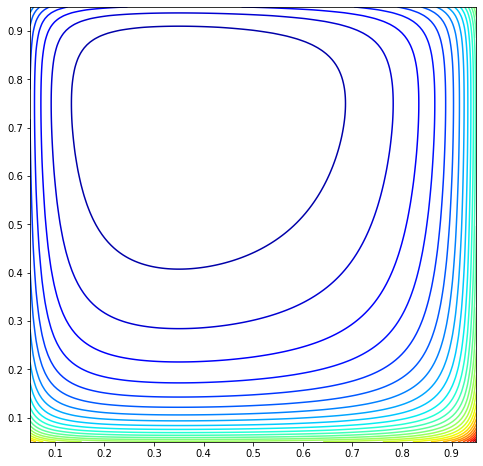

In [4]:
f = plt.figure(figsize=(8,8))
plt.contour(meshF, meshG, values, 30, cmap ='jet')
plt.show()

Ok, pretty convex looking level sets in terms of f and g. But how about in terms of the actual inputs?

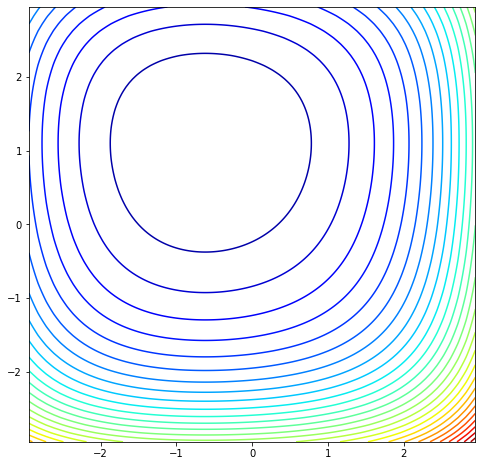

In [5]:
from scipy.special import logit

xs = logit(meshF)
ys = logit(meshG)

f = plt.figure(figsize=(8,8))
plt.contour(xs, ys, values, 30, cmap ='jet')
plt.savefig('figures/sigmoid_hamiltonian.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()